<a href="https://colab.research.google.com/github/PedroSFiguera/-Sociologia-Trabajo-de-Fin-de-Grado/blob/main/TFM_SALARIOS_DEFINITIVO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LEER DATOS

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

## PREPROCESADO

##### UNIR

In [ ]:
# UNIR X E Y PARA CREAR MI DATAFRAME.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# USO LA FUNCION CONCAT PARA UNIR AMBOS CON AXIS 1 PARA QUE LO HAGA HORIZONTALMENTE.
df = pd.concat([X, y], axis=1)

# REVISAR SI SE HA UNIDO CORRECTAMENTE
print(df.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

#### REVISIÓN

In [ ]:
# REVISO SI EL DATAFRAME TIENE ALGÚN PROBLEMA O CASOS NULOS A TRATAR.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


In [ ]:
# VERIFICANDO VALORES NULOS Y TRATANDOLOS.
print(df.isnull().sum())

# ELIMINO LAS FILAS CON VALORES NA, VACIOS.
df = df.dropna()

# REVISO LAS VARIABLES CATEGÓRICAS Y SUS CATEGORIAS.
for column in df.select_dtypes(include='object').columns:
    print(f"{column}: {df[column].unique()}")

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64
workclass: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
marital-status: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-

#### PROBLEMA CON "INCOME"

En el resultado de la celda anterior se ve que la variable 'income' o ingresos, por un punto tiene 4 categorías cuando deberían ser solo 2. En la siguiente celda se revisa toda la columna para quitar el punto en todas esas columnas.

In [ ]:
# EN EL RESUTLADO ANTERIOR SE VE QUE "INCOME" TIENE 4 CATEGORIAS EN VEZ DE 2

# AUNQUE LO MÁS DESTACADO SON LOS PUNTOS, POR SI ACASO, SE ELIMINAN LOS ESPACIOS
# AL PRINCIPIO Y AL FINAL SI ES QUE HAY.
df['income'] = df['income'].str.strip()

# UNA VEZ SEGUROS DE QUE NO HAY ESPACIOS, SE REEMPLAZAN PARA QUE NO HAYAN PUNTOS
# Y NOS QUEDEMOS SOLO CON DOS CATEGORIAS.
df['income'] = df['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})

# REVSAR SI LAS CATEGORIAS ESTÁN BIEN AHORA.
print(df['income'].unique())

['<=50K' '>50K']


In [ ]:
for column in df.select_dtypes(include='object').columns:
    print(f"{column}: {df[column].unique()}")

workclass: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
marital-status: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
relationship: ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
race: ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
sex: ['Male' 'Female']
native-country: ['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' '

### EDUCACION

In [ ]:
# COMO EDUCACIÓN TIENE TANTAS CATEGORIAS, INTENTO REDUCIRLAS PARA QUE SEA MENOS COMPLEJO
# Y ASEMEJARLO UN POCO MÁS A UN SISTEMA MÁS CONOCIDO

# SE CREA UN DICCIONARIO PARA PODER CAMBIAR A SOLO 4 CATEGORIAS.
education_mapping = {
    'Preschool': 'Educación Básica Obligatoria',
    '1st-4th': 'Educación Básica Obligatoria',
    '5th-6th': 'Educación Básica Obligatoria',
    '7th-8th': 'Educación Básica Obligatoria',
    '9th': 'Educación Media Obligatoria',
    '10th': 'Educación Media Obligatoria',
    '11th': 'Educación Media Obligatoria',
    '12th': 'Educación Media Obligatoria',
    'HS-grad': 'Educación Media Obligatoria',
    'Some-college': 'Educación Postsecundaria',
    'Assoc-acdm': 'Educación Postsecundaria',
    'Assoc-voc': 'Educación Postsecundaria',
    'Bachelors': 'Educación Postsecundaria',
    'Masters': 'Educación Postuniversitaria',
    'Doctorate': 'Educación Postuniversitaria',
    'Prof-school': 'Educación Postuniversitaria'
}

# SE MAPEA LA COLUMNA DE LA VARIABLE PARA CREAR UNA NUEVA CON LOS VALORES DESEADOS.
# CREO UNA NUEVA COLUMNA PARA PODER USAR LOS DATOS DE EDUCATION TAMBIÉN MÁS ADELANTE.
df['Education_Level'] = df['education'].map(education_mapping)

### EDAD

In [ ]:
# CON LAS EDADES QUERÍA TENER UNA FORMA MÁS RESUMIDA DE VERLAS POR FRANJAS PARA
# ENTENDER MEJOR QUÉ EDADES ERAN LAS MÁS COMUNES

# ASÍ DEFINO LAS FRANJAS DE EDAD.
bins = [17, 25, 33, 41, 49, 57, 64, 100]

# DEFINO LAS ETIQUETAS PARA LOS INTERVALOS
labels = ['17-24', '25-32', '33-40', '41-48', '49-56', '57-64', '64+']

# CREO UNA NUEVA COLUMNA CON ESTOS DATOS
df['Intervalo_Edad'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)


In [ ]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,Education_Level,Intervalo_Edad
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Educación Postsecundaria,33-40
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Educación Postsecundaria,49-56
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Educación Media Obligatoria,33-40
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Educación Media Obligatoria,49-56
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Educación Postsecundaria,25-32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K,Educación Postsecundaria,33-40
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K,Educación Postsecundaria,33-40
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K,Educación Postsecundaria,33-40
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K,Educación Postsecundaria,41-48


### NACIONALIDADES

In [ ]:
# EN ESTE CASO SUCEDE PARECIDO QUE CON LA EDUCACIÓN, PERO CON MUCHISIMAS MÁS CATEGORÍAS
# ASI QUE LO ORGANIZO DE FORMA SIMPLISTA, PERO QUE EN UN ANÁLISIS PERMITIRÁ VER
# COMO SE DESARROLLAN CIERTAS CUESTIONES SOCIALES, ADEMÁS QUE LA COLUMNA ETNIA
# YA DA BASTANTE INFORMACIÓN RELEVANTE

# NUEVA COLUMNA QUE CAMBIA LOS QUE NO NACIERON EN ESTADOS UNIDOS POR INMIGRANTES.
df['country-label'] = df['native-country'].apply(lambda x: 'United-States' if x == 'United-States' else 'Inmigrants')

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 47621 entries, 0 to 48841
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              47621 non-null  int64   
 1   workclass        47621 non-null  object  
 2   fnlwgt           47621 non-null  int64   
 3   education        47621 non-null  object  
 4   education-num    47621 non-null  int64   
 5   marital-status   47621 non-null  object  
 6   occupation       47621 non-null  object  
 7   relationship     47621 non-null  object  
 8   race             47621 non-null  object  
 9   sex              47621 non-null  object  
 10  capital-gain     47621 non-null  int64   
 11  capital-loss     47621 non-null  int64   
 12  hours-per-week   47621 non-null  int64   
 13  native-country   47621 non-null  object  
 14  income           47621 non-null  object  
 15  Education_Level  47621 non-null  object  
 16  Intervalo_Edad   47621 non-null  category
 17

In [ ]:
# DESCRIPCIÓN DE TODO EL DATAFRAME
df.describe(include = 'all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,Education_Level,Intervalo_Edad,country-label
count,47621.000000,47621,4.762100e+04,47621,47621.000000,47621,47621,47621,47621,47621,47621.000000,47621.000000,47621.000000,47621,47621,47621,47621,47621
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2,4,7,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K,Educación Postsecundaria,33-40,United-States
freq,NaN,33717,NaN,15444,NaN,21966,6110,19396,40786,31937,NaN,NaN,NaN,42958,36080,21993,10128,42958
mean,38.640684,NaN,1.897271e+05,NaN,10.090821,NaN,NaN,NaN,NaN,NaN,1091.137649,87.853489,40.600050,NaN,NaN,NaN,NaN,NaN
std,13.558961,NaN,1.055695e+05,NaN,2.568320,NaN,NaN,NaN,NaN,NaN,7487.228336,404.010612,12.260345,NaN,NaN,NaN,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,28.000000,NaN,1.175840e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN,NaN,NaN,NaN
50%,37.000000,NaN,1.782820e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN,NaN,NaN,NaN
75%,48.000000,NaN,2.377200e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN,NaN,NaN,NaN


## ANALISIS EXPLORATORIO

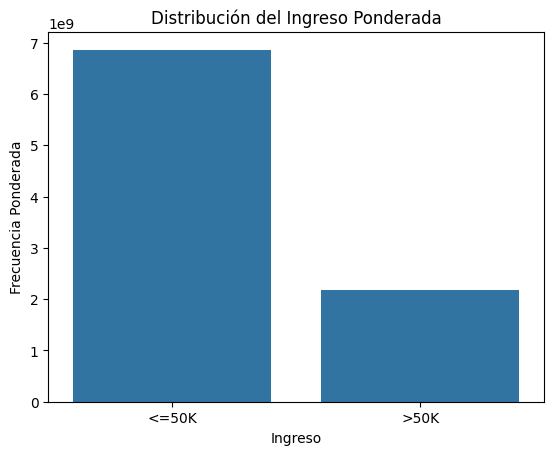

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_weighted = df.copy()

# USO LA VARIABLE DE PONDERACIÓN Y LA APLICO PARA TENER EL VALOR PONDERADO
income_weighted = df_weighted.groupby('income')['fnlwgt'].sum().reset_index()

# RENOMBRO LAS VARIABLES POR RECOMENDACIÓN
income_weighted.columns = ['income', 'weighted_count']

# CREO EL GRAFICO
sns.barplot(x='income', y='weighted_count', data=income_weighted)

# TITULO Y ETIQUETAS
plt.title('Distribución del Ingreso Ponderada')
plt.ylabel('Frecuencia Ponderada')
plt.xlabel('Ingreso')
plt.show()

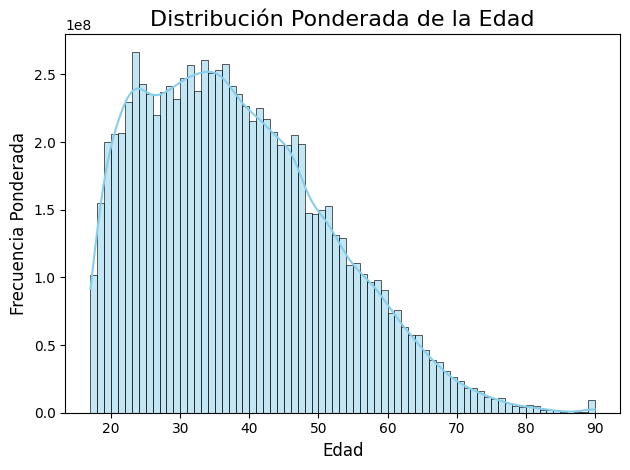

In [ ]:
# CONFIGURO EL GRÁFICO Y LO PONDERO
sns.histplot(
    data=df_weighted,
    x='age',
    weights=df_weighted['fnlwgt'],
    kde=True,
    binwidth=1,
    color='skyblue'
)

# TITULO, EJES Y ETIQUETAS
plt.title('Distribución Ponderada de la Edad', fontsize=16)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Frecuencia Ponderada', fontsize=12)

# MOSTRAR
plt.tight_layout()
plt.show()


<ipython-input-16-0b5fc2ace2e0>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  intervalos_edad_weighted = df_weighted.groupby('Intervalo_Edad')['fnlwgt'].sum().reset_index()


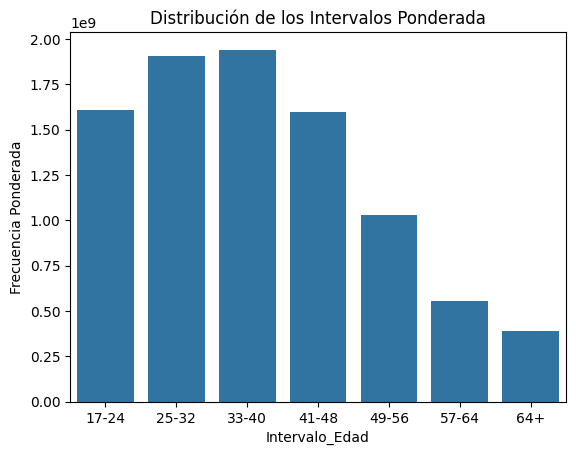

In [ ]:
intervalos_edad_weighted = df_weighted.groupby('Intervalo_Edad')['fnlwgt'].sum().reset_index()

intervalos_edad_weighted.columns = ['Intervalo_Edad', 'weighted_count']

sns.barplot(x='Intervalo_Edad', y='weighted_count', data=intervalos_edad_weighted)

plt.title('Distribución de los Intervalos Ponderada')
plt.ylabel('Frecuencia Ponderada')
plt.xlabel('Intervalo_Edad')
plt.show()

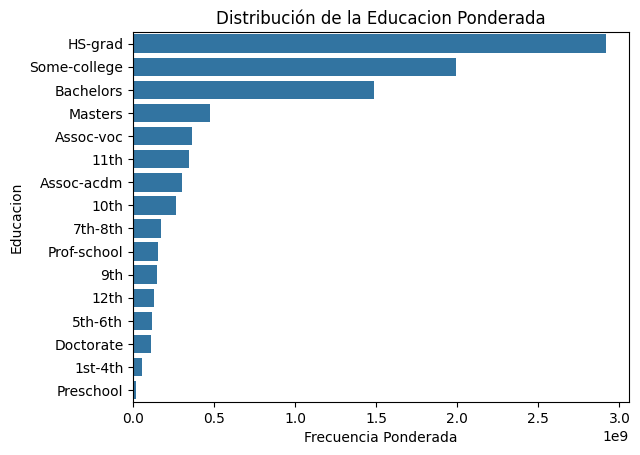

In [ ]:
educacion_weighted = df_weighted.groupby('education')['fnlwgt'].sum().reset_index()

educacion_weighted.columns = ['education', 'weighted_count']

# LO PONGO DE FORMA DESCENDENTE PARA QUE SE VEA MÁS ORDENADO
educacion_weighted = educacion_weighted.sort_values(by='weighted_count', ascending=False)

sns.barplot(x='weighted_count', y='education', data=educacion_weighted)

plt.title('Distribución de la Educacion Ponderada')
plt.ylabel('Educacion')
plt.xlabel('Frecuencia Ponderada')
plt.show()

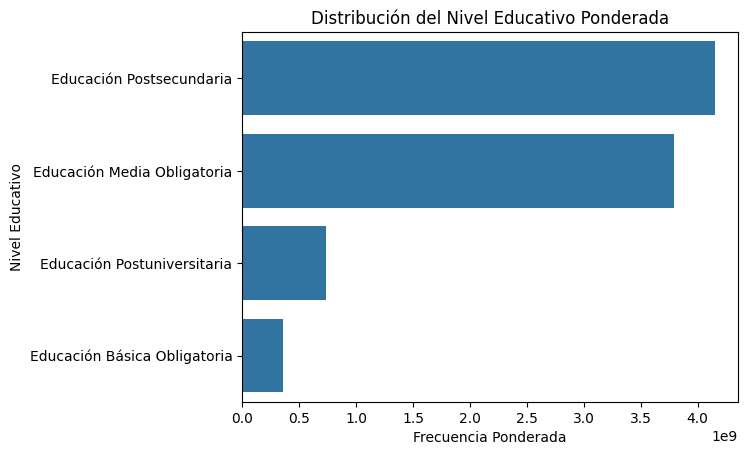

In [ ]:
nivel_educativo_weighted = df_weighted.groupby('Education_Level')['fnlwgt'].sum().reset_index()

nivel_educativo_weighted.columns = ['Education_Level', 'weighted_count']

nivel_educativo_weighted = nivel_educativo_weighted.sort_values(by='weighted_count', ascending=False)

sns.barplot(x='weighted_count', y='Education_Level', data=nivel_educativo_weighted)

plt.title('Distribución del Nivel Educativo Ponderada')
plt.ylabel('Nivel Educativo')
plt.xlabel('Frecuencia Ponderada')
plt.show()

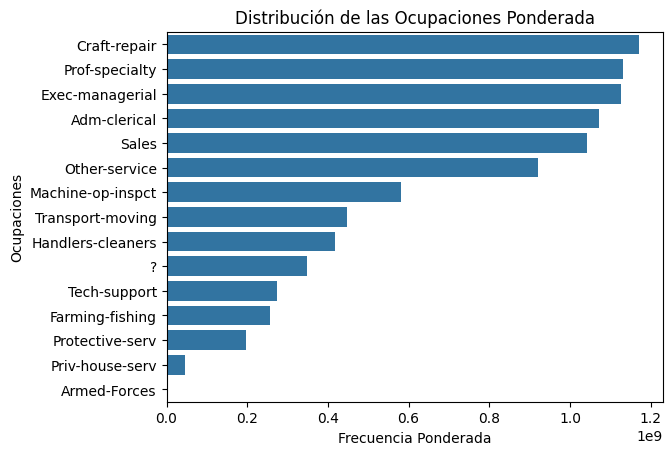

In [ ]:
sector_laboral_weighted = df_weighted.groupby('occupation')['fnlwgt'].sum().reset_index()

sector_laboral_weighted.columns = ['occupation', 'weighted_count']

sector_laboral_weighted = sector_laboral_weighted.sort_values(by='weighted_count', ascending=False)


sns.barplot(x='weighted_count', y='occupation', data=sector_laboral_weighted)

plt.title('Distribución de las Ocupaciones Ponderada')
plt.ylabel('Ocupaciones')
plt.xlabel('Frecuencia Ponderada')
plt.show()

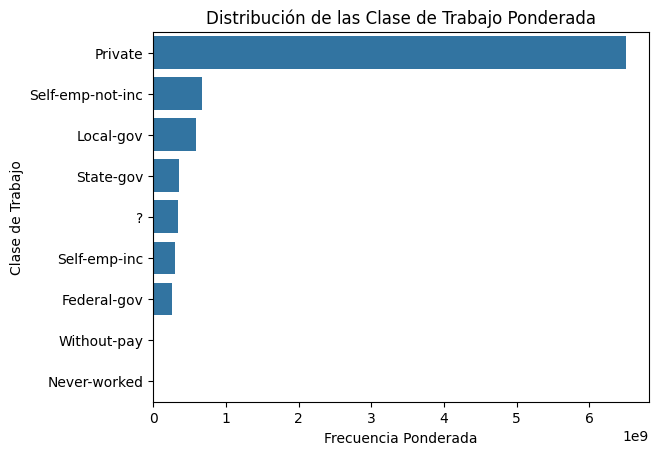

In [ ]:
clase_trabajo_weighted = df_weighted.groupby('workclass')['fnlwgt'].sum().reset_index()

clase_trabajo_weighted.columns = ['workclass', 'weighted_count']

clase_trabajo_weighted = clase_trabajo_weighted.sort_values(by='weighted_count', ascending=False)

sns.barplot(x='weighted_count', y='workclass', data=clase_trabajo_weighted)

plt.title('Distribución de las Clase de Trabajo Ponderada')
plt.ylabel('Clase de Trabajo')
plt.xlabel('Frecuencia Ponderada')
plt.show()

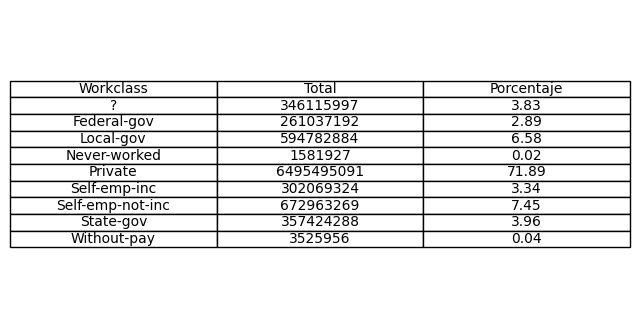

In [ ]:
table_df = df_weighted.groupby('workclass')['fnlwgt'].sum().reset_index()
table_df.columns = ['Workclass', 'Total']

# QUIERO CREAR UNA COLUMNA NUEVA CON LOS PORCENTAJES SIN QUITAR EL CONTEO YA
# QUE QUIERO SEGUIR MOSTRANDO LA MAGNITUD DE LA DIFERENCIA EN NÚMEROS.
total_count = table_df['Total'].sum()
table_df['Porcentaje'] = (table_df['Total'] / total_count) * 100

# QUIERO SOLO DOS DECIMALES EN LOS PORCENTAJES
table_df['Porcentaje'] = table_df['Porcentaje'].round(2)

# SE CREA LA "TABLA" Y SE PONE EL TAMAÑO DESEADO
fig, ax = plt.subplots(figsize=(8, 4))

# COMO QUIERO QUE SEA COMO UNA TABLA, OCULTO LOS EJES.
ax.axis('off')
ax.axis('tight')

# CREAR IMAGEN CON LA TABLA
ax.table(cellText=table_df.values, colLabels=table_df.columns, cellLoc='center', loc='center')

plt.show()


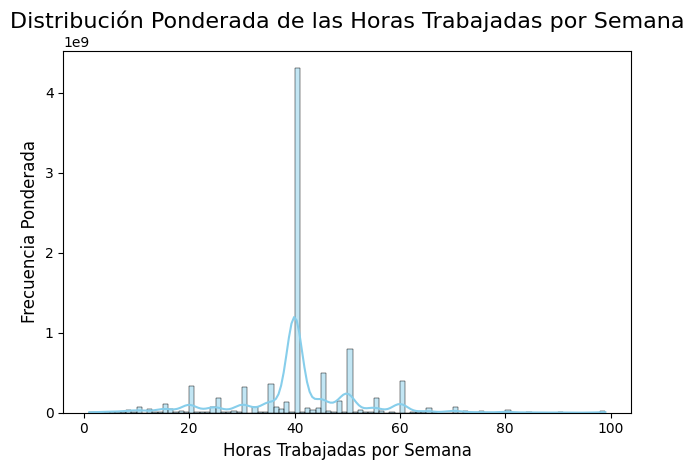

In [ ]:
sns.histplot(
    data=df_weighted,
    x='hours-per-week',
    weights=df_weighted['fnlwgt'],
    kde=True,
    binwidth=1,
    color='skyblue'
)

plt.title('Distribución Ponderada de las Horas Trabajadas por Semana', fontsize=16)

plt.xlabel('Horas Trabajadas por Semana', fontsize=12)

plt.ylabel('Frecuencia Ponderada', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
df['hours-per-week'].value_counts()

,count
hours-per-week,
40,22324
50,4195
45,2673
60,2155
35,1889
...,...
79,1
94,1
82,1


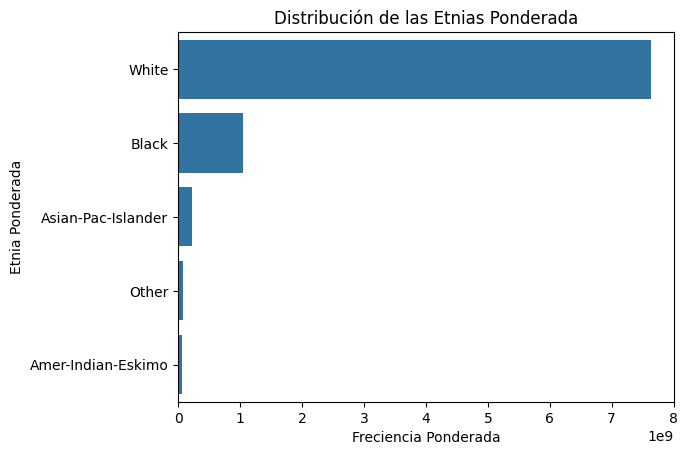

In [ ]:
etnia_weighted = df_weighted.groupby('race')['fnlwgt'].sum().reset_index()

etnia_weighted.columns = ['race', 'weighted_count']

etnia_weighted = etnia_weighted.sort_values(by='weighted_count', ascending=False)

sns.barplot(x='weighted_count', y='race', data=etnia_weighted)

plt.title('Distribución de las Etnias Ponderada')
plt.ylabel('Etnia Ponderada')
plt.xlabel('Freciencia Ponderada')
plt.show()

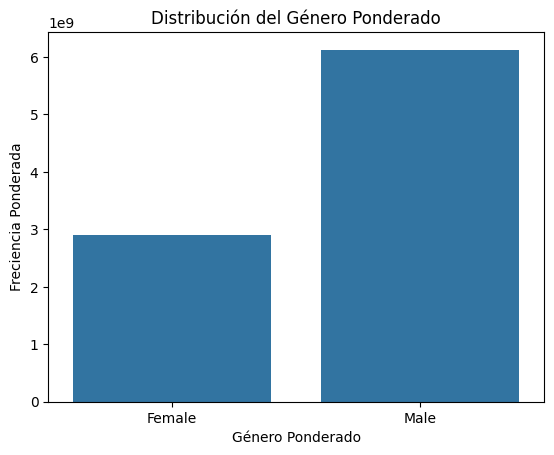

In [ ]:
genero_weighted = df_weighted.groupby('sex')['fnlwgt'].sum().reset_index()

genero_weighted.columns = ['sex', 'weighted_count']

sns.barplot(x='sex', y='weighted_count', data=genero_weighted)

plt.title('Distribución del Género Ponderado')
plt.ylabel('Freciencia Ponderada')
plt.xlabel('Género Ponderado')
plt.show()

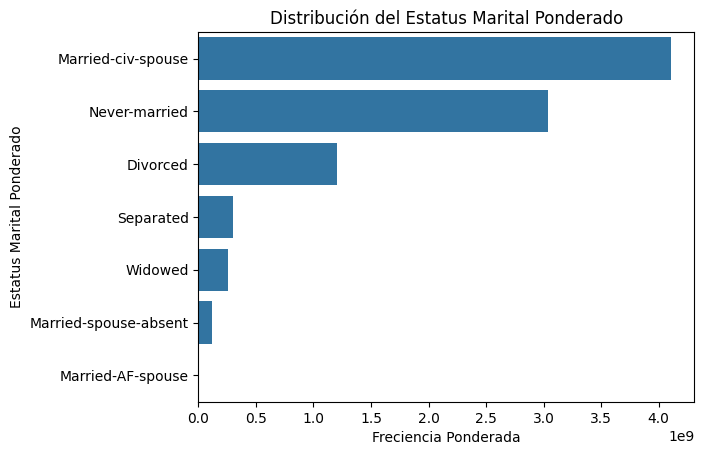

In [ ]:
estatus_marital_weighted = df_weighted.groupby('marital-status')['fnlwgt'].sum().reset_index()

estatus_marital_weighted.columns = ['marital-status', 'weighted_count']

estatus_marital_weighted = estatus_marital_weighted.sort_values(by='weighted_count', ascending=False)

sns.barplot(x='weighted_count', y='marital-status', data=estatus_marital_weighted)

plt.title('Distribución del Estatus Marital Ponderado')
plt.ylabel('Estatus Marital Ponderado')
plt.xlabel('Freciencia Ponderada')
plt.show()

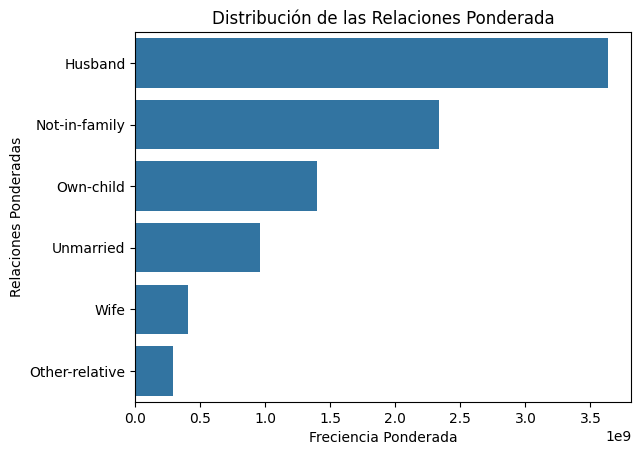

In [ ]:
relaciones_weighted = df_weighted.groupby('relationship')['fnlwgt'].sum().reset_index()

relaciones_weighted.columns = ['relationship', 'weighted_count']

relaciones_weighted = relaciones_weighted.sort_values(by='weighted_count', ascending=False)

sns.barplot(x='weighted_count', y='relationship', data=relaciones_weighted)

plt.title('Distribución de las Relaciones Ponderada')
plt.ylabel('Relaciones Ponderadas')
plt.xlabel('Freciencia Ponderada')
plt.show()

In [ ]:
df['native-country'].value_counts()

,count
native-country,
United-States,42958
Mexico,936
?,583
Philippines,293
Germany,202
Puerto-Rico,180
Canada,177
El-Salvador,153
India,147


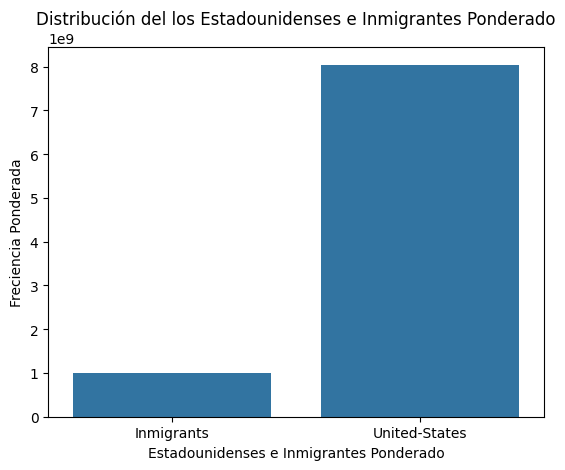

In [ ]:
inmigracion_weighted = df_weighted.groupby('country-label')['fnlwgt'].sum().reset_index()

inmigracion_weighted.columns = ['country-label', 'weighted_count']

sns.barplot(x='country-label', y='weighted_count', data=inmigracion_weighted)

plt.title('Distribución del los Estadounidenses e Inmigrantes Ponderado')
plt.ylabel('Freciencia Ponderada')
plt.xlabel('Estadounidenses e Inmigrantes Ponderado')
plt.show()

## TABLAS CRUZADAS

#### OCUPACION-EDUCACION

Nivel Educativo    Educación Básica Obligatoria  Educación Media Obligatoria  \
Ocupación                                                                      
?                                      6.447774                    47.143145   
Adm-clerical                           0.629949                    41.196959   
Armed-Forces                                NaN                    33.676944   
Craft-repair                           5.287557                    60.233923   
Exec-managerial                        0.544839                    21.331800   
Farming-fishing                       18.928385                    50.739727   
Handlers-cleaners                      8.784701                    65.233510   
Machine-op-inspct                      9.477882                    66.173070   
Other-service                          7.096196                    57.653037   
Priv-house-serv                       24.100829                    59.262582   
Prof-specialty                         0

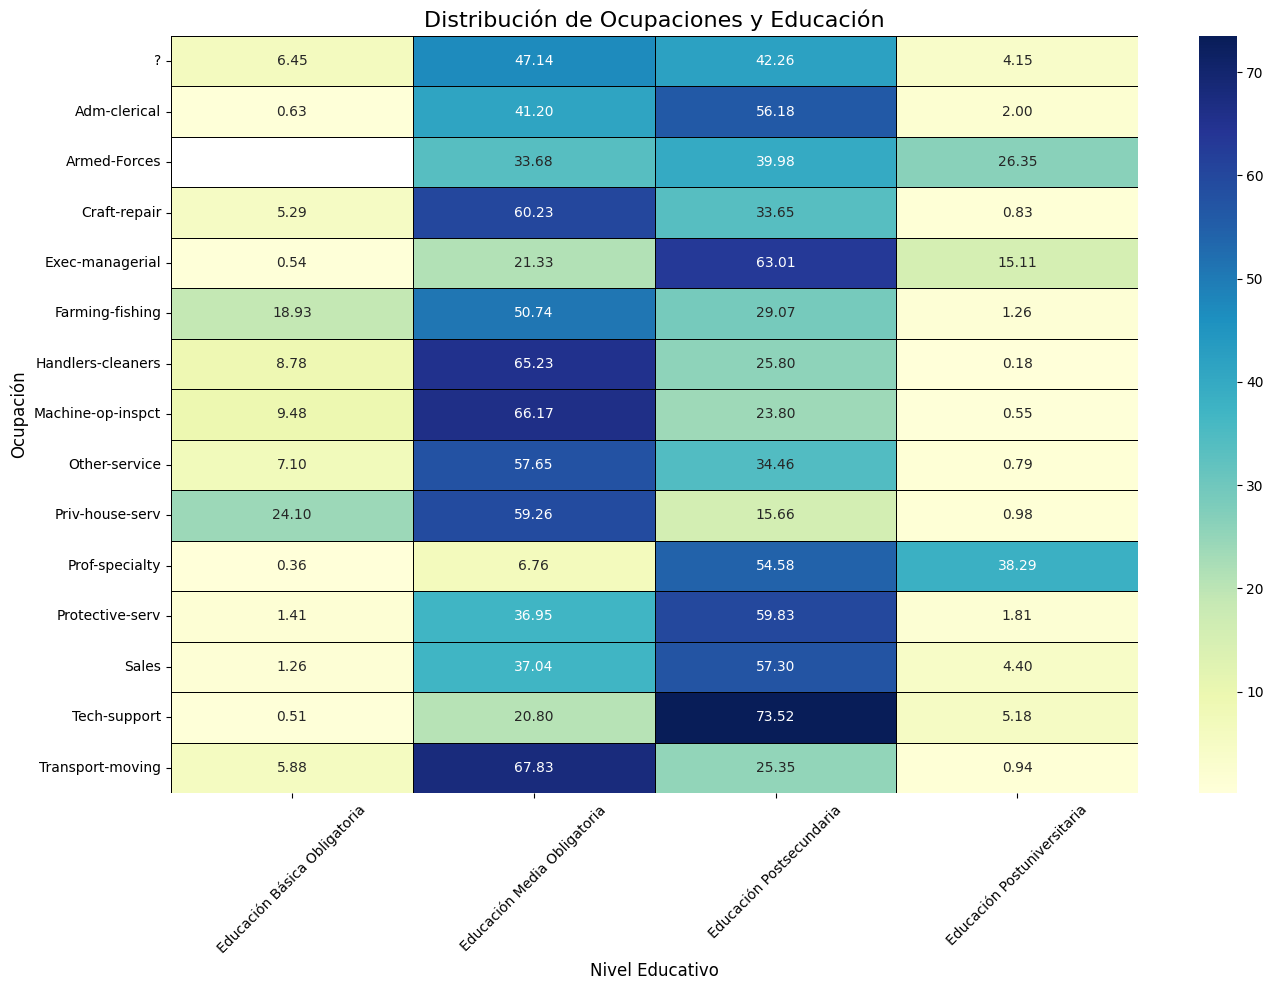

In [ ]:
# REALIZO LA TABLA CRUZADA CON LA PONDERACIÓN QUE ME PROPORCIONAN
tabla_ocupacion_educacion = pd.crosstab(df['occupation'],
                                        df['Education_Level'],
                                        values=df['fnlwgt'],
                                        aggfunc='sum'
                                        )
tabla_ocupacion_educacion

# CONVIERTO LOS VALORES A PORCENTAJES
tabla_ocupacion_educacion_pct = tabla_ocupacion_educacion.div(tabla_ocupacion_educacion.sum(axis=1), axis=0) * 100

tabla_ocupacion_educacion_pct.index.name = 'Ocupación'
tabla_ocupacion_educacion_pct.columns.name = 'Nivel Educativo'

# MUESTRO LA TRABAL CRUZADA "EN BRUTO"
print(tabla_ocupacion_educacion_pct)

# REALIZO LA TABLA-GRAFICO EN UN HEATMAP
plt.figure(figsize=(14, 10))
sns.heatmap(tabla_ocupacion_educacion_pct, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True, linewidths=0.5, linecolor='black')

plt.title('Distribución de Ocupaciones y Educación', fontsize=16)
plt.xlabel('Nivel Educativo', fontsize=12)
plt.ylabel('Ocupación', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

#### OCUPACION-SEXO

Genero                  Female          Male
Ocupación                                   
?                  155762633.0  1.919353e+08
Adm-clerical       708563500.0  3.638000e+08
Armed-Forces               NaN  3.063936e+06
Craft-repair        60710157.0  1.110120e+09
Exec-managerial    319720120.0  8.075310e+08
Farming-fishing     17562082.0  2.379081e+08
Handlers-cleaners   50504213.0  3.670466e+08
Machine-op-inspct  149541348.0  4.316791e+08
Other-service      482563642.0  4.370292e+08
Priv-house-serv     43683178.0  2.502142e+06
Prof-specialty     398602191.0  7.340149e+08
Protective-serv     25254759.0  1.724059e+08
Sales              364853432.0  6.777093e+08
Tech-support       107385542.0  1.654546e+08
Transport-moving    24442024.0  4.236474e+08


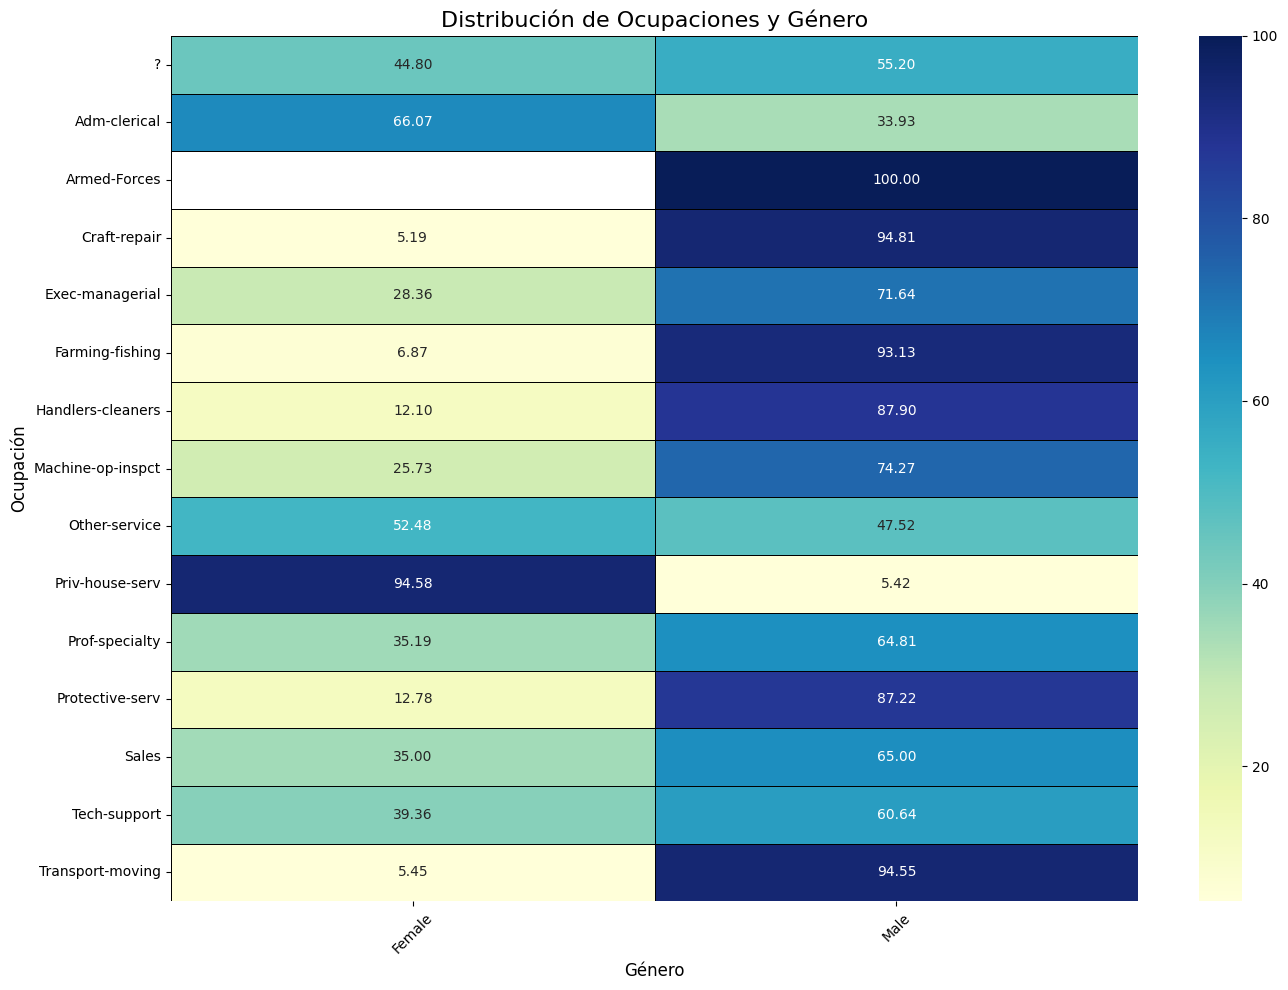

In [ ]:
tabla_ocupacion_sexo = pd.crosstab(df['occupation'],
                                   df['sex'],
                                   values=df['fnlwgt'],
                                   aggfunc='sum'
                                  )
tabla_ocupacion_sexo

tabla_ocupacion_sexo_pct = tabla_ocupacion_sexo.div(tabla_ocupacion_sexo.sum(axis=1), axis=0) * 100

tabla_ocupacion_sexo_pct.index.name = 'Ocupación'
tabla_ocupacion_sexo_pct.columns.name = 'Genero'

print(tabla_ocupacion_sexo)

plt.figure(figsize=(14, 10))
sns.heatmap(tabla_ocupacion_sexo_pct, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True, linewidths=0.5, linecolor='black')

plt.title('Distribución de Ocupaciones y Género', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Ocupación', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

#### OCUPACION-RAZA

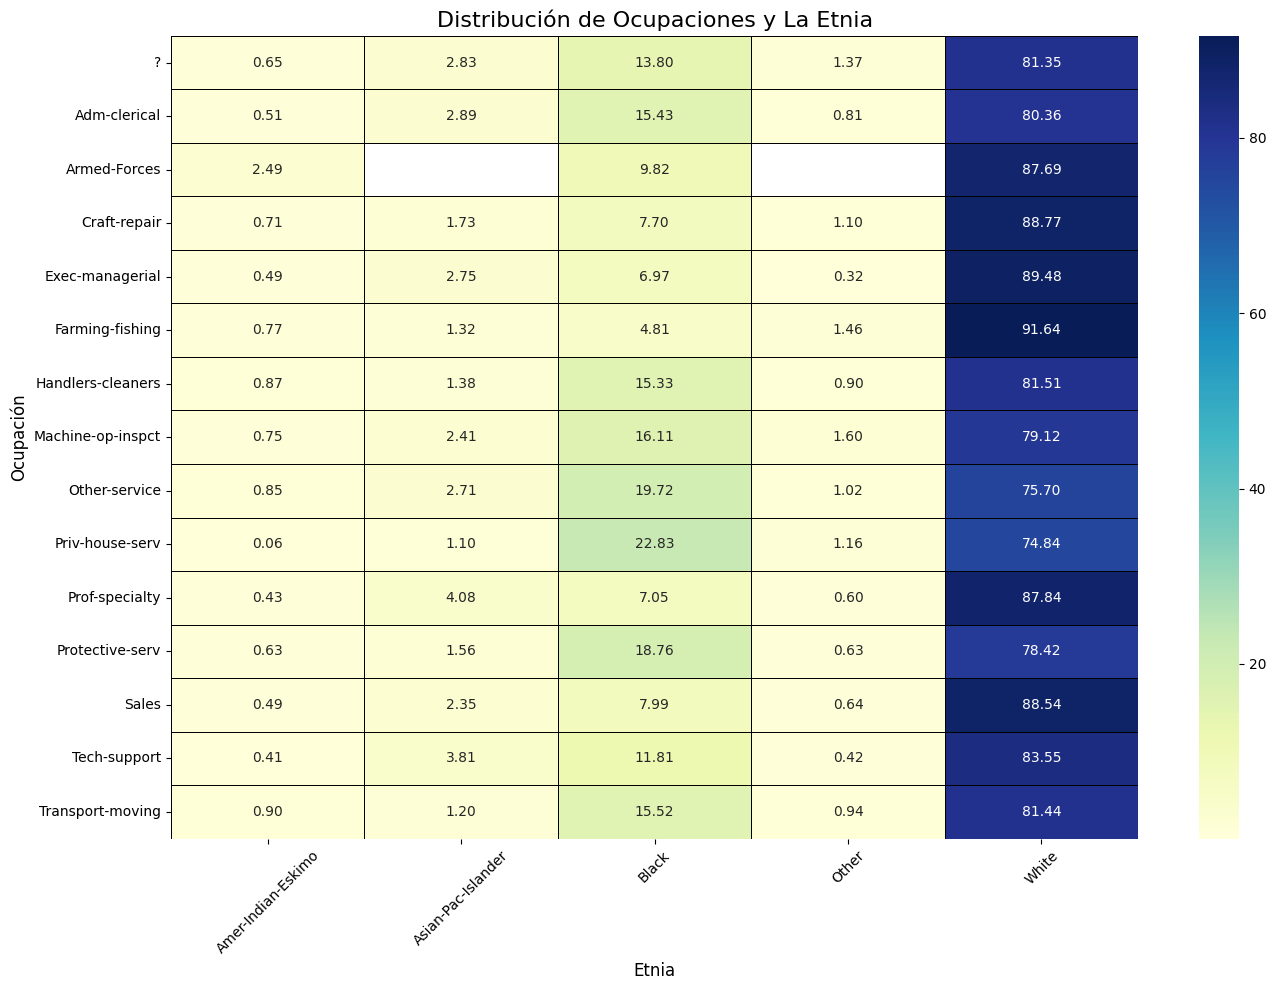

In [ ]:
tabla_ocupacion_raza = pd.crosstab(df['occupation'],
                                   df['race'],
                                   values=df['fnlwgt'],
                                   aggfunc='sum'
                                    )
tabla_ocupacion_raza

tabla_ocupacion_raza_pct = tabla_ocupacion_raza.div(tabla_ocupacion_raza.sum(axis=1), axis=0) * 100

tabla_ocupacion_raza_pct.index.name = 'Ocupación'
tabla_ocupacion_raza_pct.columns.name = 'Etnia'

plt.figure(figsize=(14, 10))
sns.heatmap(tabla_ocupacion_raza_pct, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True, linewidths=0.5, linecolor='black')

plt.title('Distribución de Ocupaciones y La Etnia', fontsize=16)
plt.xlabel('Etnia', fontsize=12)
plt.ylabel('Ocupación', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

#### OCUPACION-EDAD

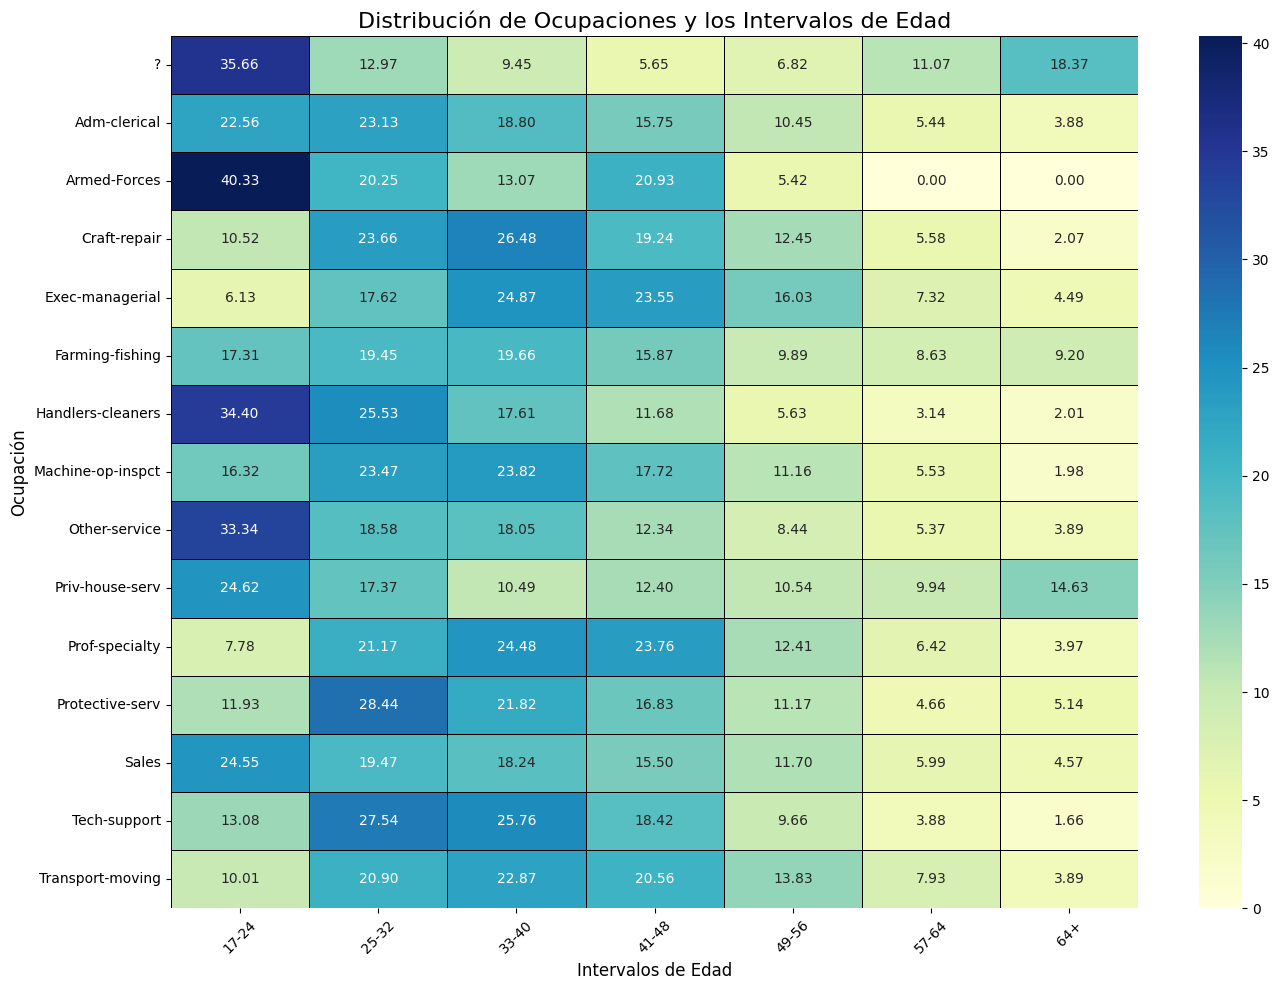

In [ ]:
tabla_ocupacion_edad = pd.crosstab(df['occupation'],
                                   df['Intervalo_Edad'],
                                   values=df['fnlwgt'],
                                   aggfunc='sum'
                                    )
tabla_ocupacion_edad

tabla_ocupacion_edad_pct = tabla_ocupacion_edad.div(tabla_ocupacion_edad.sum(axis=1), axis=0) * 100

tabla_ocupacion_edad_pct.index.name = 'Ocupación'
tabla_ocupacion_edad_pct.columns.name = 'Intervalos de Edad'

plt.figure(figsize=(14, 10))
sns.heatmap(tabla_ocupacion_edad_pct, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True, linewidths=0.5, linecolor='black')

plt.title('Distribución de Ocupaciones y los Intervalos de Edad', fontsize=16)
plt.xlabel('Intervalos de Edad', fontsize=12)
plt.ylabel('Ocupación', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

#### OCUPACION-ESTATUS MARITAL

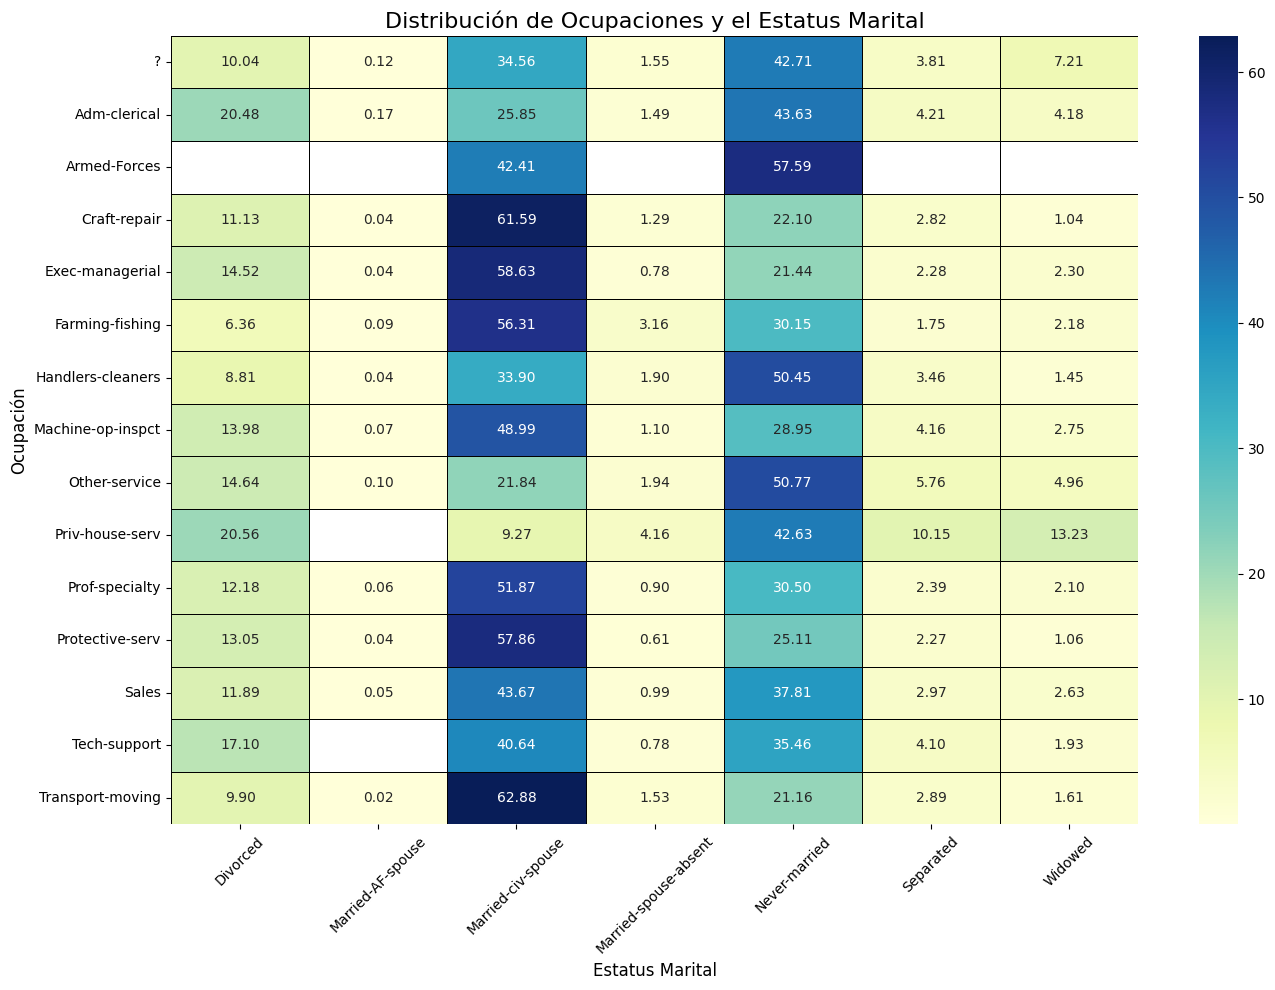

In [ ]:
tabla_ocupacion_estatus = pd.crosstab(df['occupation'],
                                      df['marital-status'],
                                      values=df['fnlwgt'],
                                      aggfunc='sum'
                                      )
tabla_ocupacion_estatus

tabla_ocupacion_estatus_pct = tabla_ocupacion_estatus.div(tabla_ocupacion_estatus.sum(axis=1), axis=0) * 100

tabla_ocupacion_estatus_pct.index.name = 'Ocupación'
tabla_ocupacion_estatus_pct.columns.name = 'Estatus Marital'

plt.figure(figsize=(14, 10))
sns.heatmap(tabla_ocupacion_estatus_pct, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True, linewidths=0.5, linecolor='black')

plt.title('Distribución de Ocupaciones y el Estatus Marital', fontsize=16)
plt.xlabel('Estatus Marital', fontsize=12)
plt.ylabel('Ocupación', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

#### SALARIO-SEXO

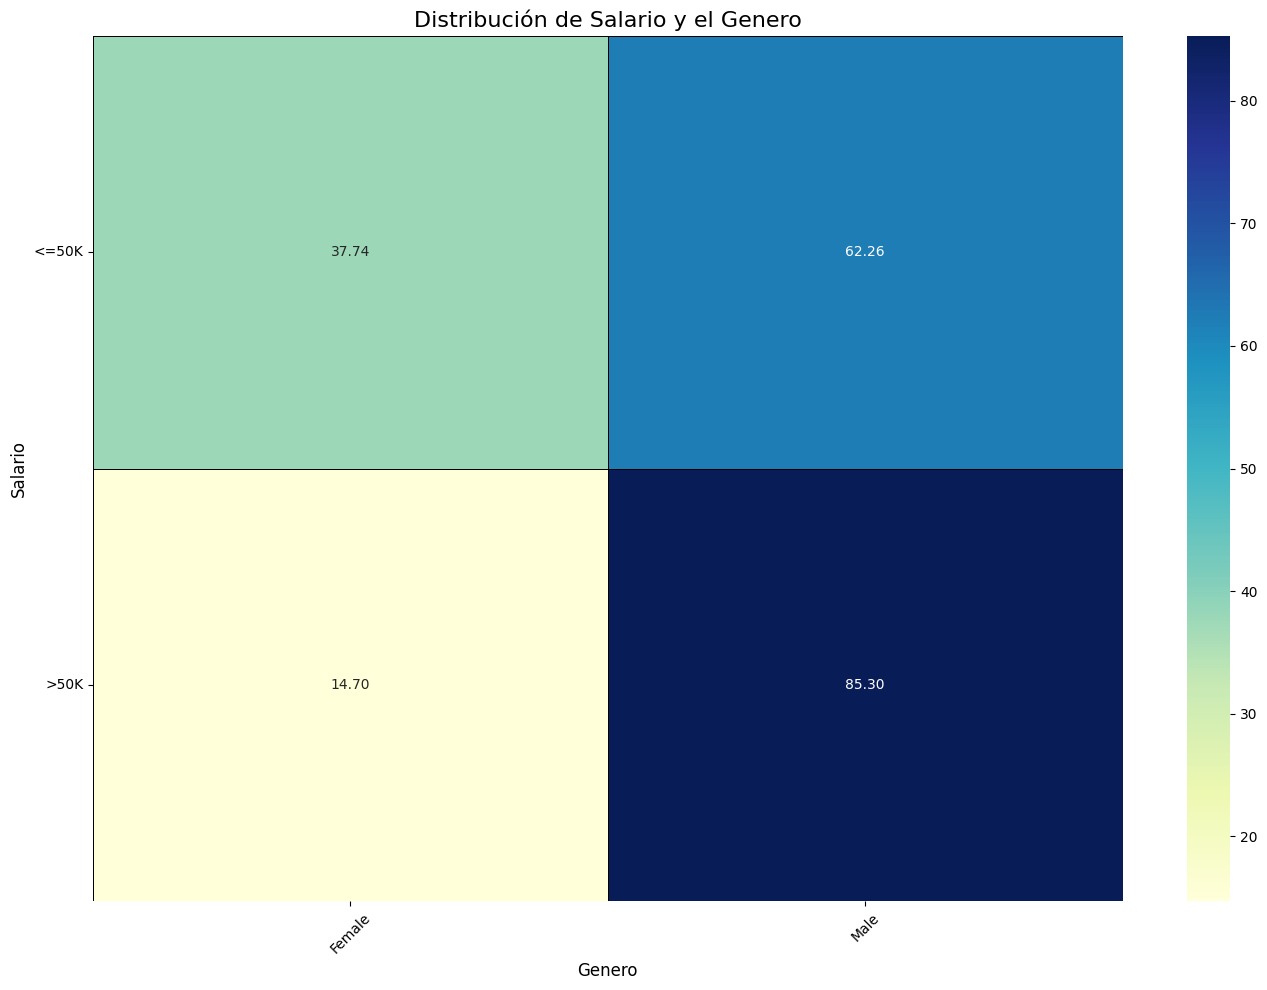

In [ ]:
tabla_salario_sexo = pd.crosstab(df['income'],
                                 df['sex'],
                                 values=df['fnlwgt'],
                                 aggfunc='sum'
                                  )
tabla_salario_sexo

tabla_salario_sexo_pct = tabla_salario_sexo.div(tabla_salario_sexo.sum(axis=1), axis=0) * 100

tabla_salario_sexo_pct.index.name = 'Salario'
tabla_salario_sexo_pct.columns.name = 'Genero'

plt.figure(figsize=(14, 10))
sns.heatmap(tabla_salario_sexo_pct, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True, linewidths=0.5, linecolor='black')

plt.title('Distribución de Salario y el Genero', fontsize=16)
plt.xlabel('Genero', fontsize=12)
plt.ylabel('Salario', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

#### SALARIO-OCUPACION

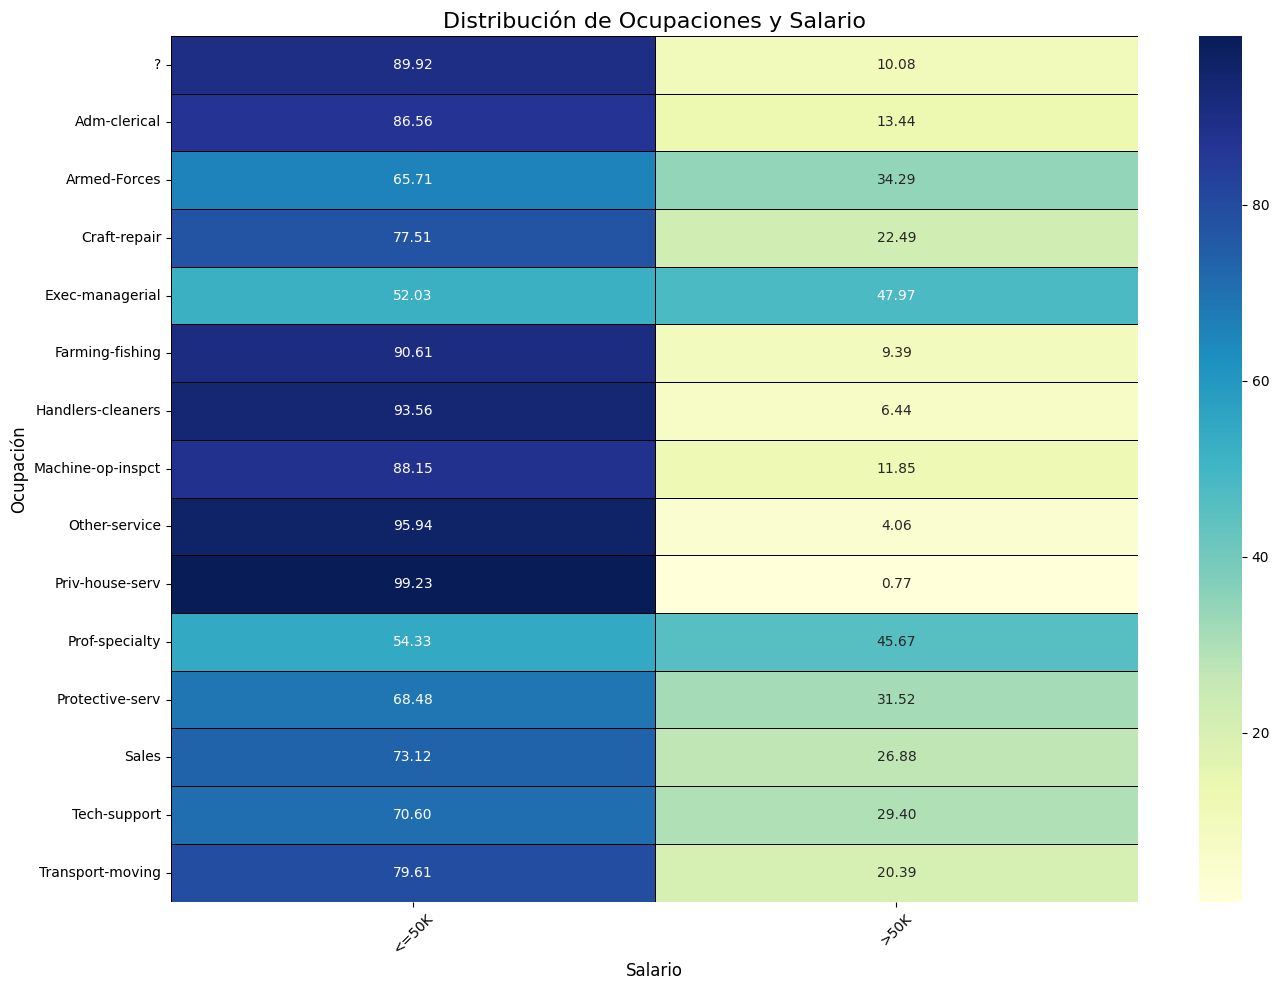

In [ ]:
tabla_salario_ocupacion = pd.crosstab(df['occupation'],
                                      df['income'],
                                      values=df['fnlwgt'],
                                      aggfunc='sum'
                                      )

tabla_salario_ocupacion_pct = tabla_salario_ocupacion.div(tabla_salario_ocupacion.sum(axis=1), axis=0) * 100

tabla_salario_ocupacion_pct.index.name = 'Ocupación'
tabla_salario_ocupacion_pct.columns.name = 'Salario'

plt.figure(figsize=(14, 10))
sns.heatmap(tabla_salario_ocupacion_pct, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True, linewidths=0.5, linecolor='black')

plt.title('Distribución de Ocupaciones y Salario', fontsize=16)
plt.xlabel('Salario', fontsize=12)
plt.ylabel('Ocupación', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

#### SALARIO - ESTADO LABORAL

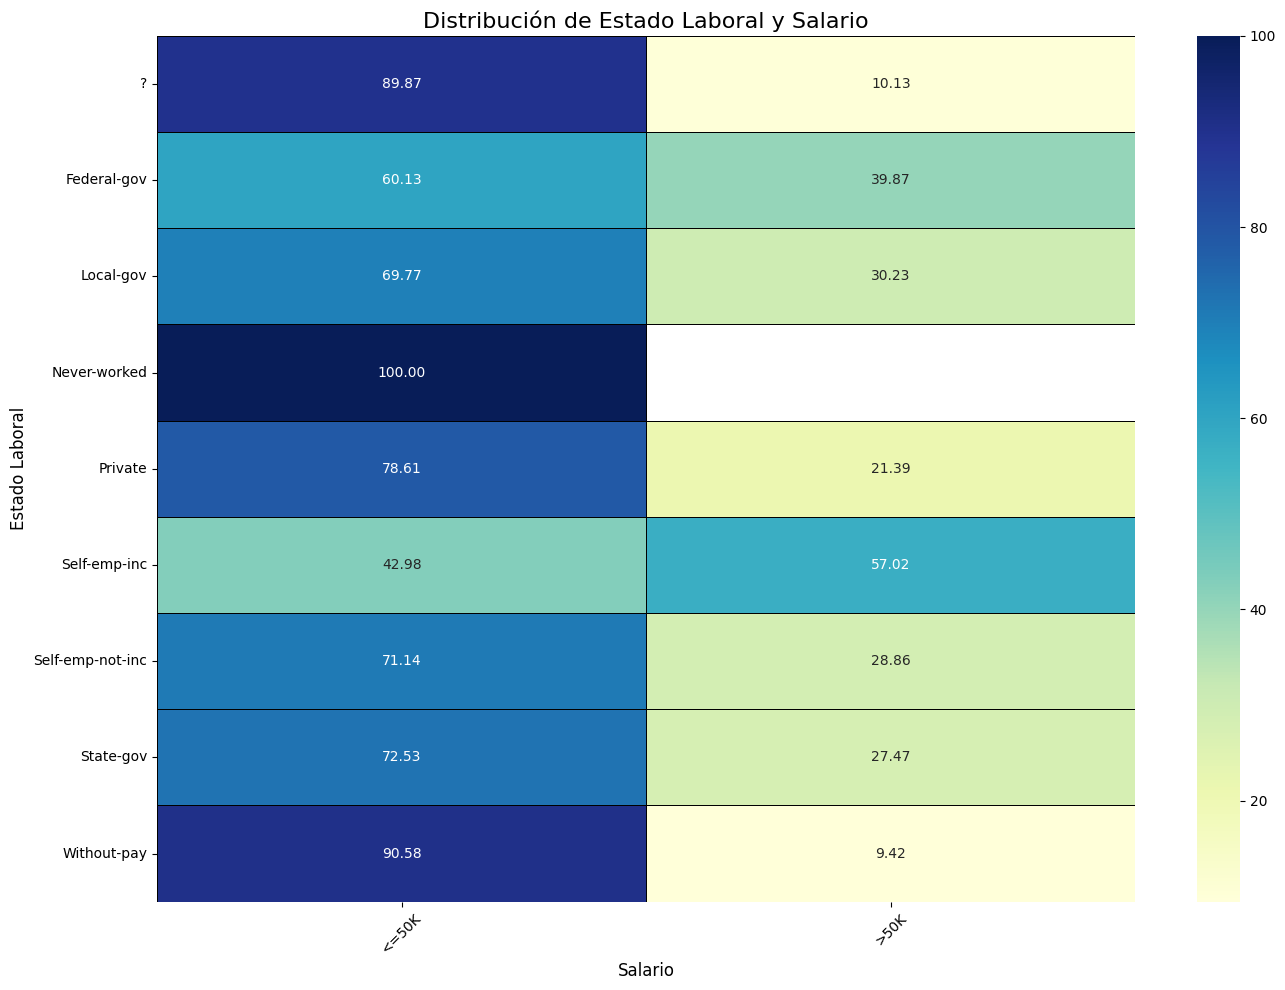

In [ ]:
tabla_salario_estado_laboral = pd.crosstab(df['workclass'],
                                           df['income'],
                                           values=df['fnlwgt'],
                                           aggfunc='sum'
                                           )

tabla_salario_estado_laboral_pct = tabla_salario_estado_laboral.div(tabla_salario_estado_laboral.sum(axis=1), axis=0) * 100

tabla_salario_estado_laboral_pct.index.name = 'Estado Laboral'
tabla_salario_estado_laboral_pct.columns.name = 'Salario'

plt.figure(figsize=(14, 10))
sns.heatmap(tabla_salario_estado_laboral_pct, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True, linewidths=0.5, linecolor='black')

plt.title('Distribución de Estado Laboral y Salario', fontsize=16)
plt.xlabel('Salario', fontsize=12)
plt.ylabel('Estado Laboral', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

#### SALARIO-RAZA

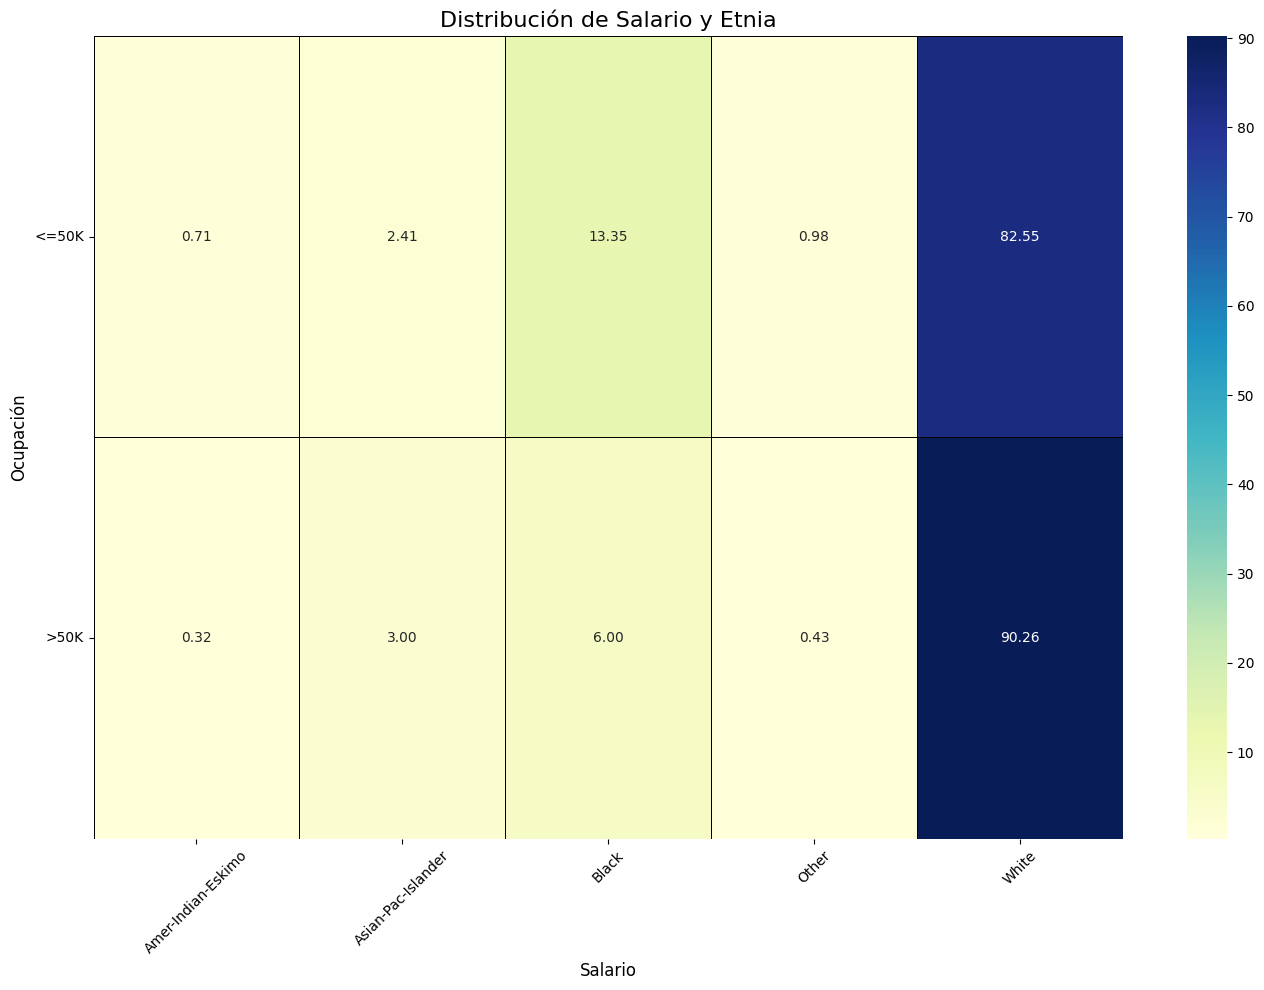

In [ ]:
tabla_salario_raza = pd.crosstab(df['income'],
                                 df['race'],
                                 values=df['fnlwgt'],
                                 aggfunc='sum'
                                  )
tabla_salario_raza

tabla_salario_raza_pct = tabla_salario_raza.div(tabla_salario_raza.sum(axis=1), axis=0) * 100

tabla_salario_raza_pct.index.name = 'Salario'
tabla_salario_raza_pct.columns.name = 'Etnia'

plt.figure(figsize=(14, 10))
sns.heatmap(tabla_salario_raza_pct, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True, linewidths=0.5, linecolor='black')

plt.title('Distribución de Salario y Etnia', fontsize=16)
plt.xlabel('Salario', fontsize=12)
plt.ylabel('Ocupación', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

#### EDUCACION-EDAD

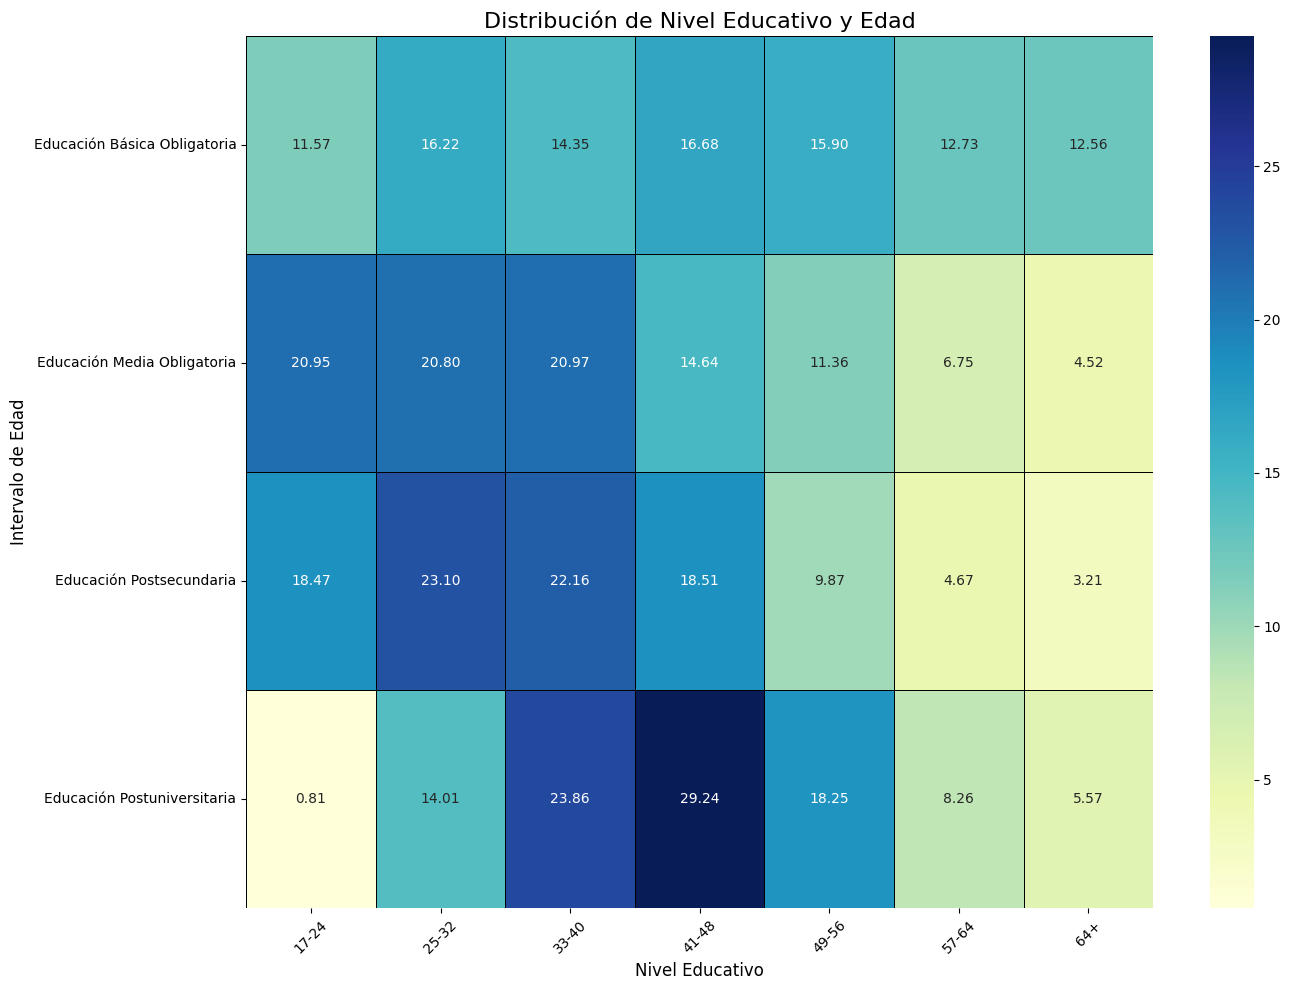

In [ ]:
tabla_educacion_edad = pd.crosstab(df['Education_Level'],
                                   df['Intervalo_Edad'],
                                   values=df['fnlwgt'],
                                   aggfunc='sum'
                                  )

tabla_educacion_edad_pct = tabla_educacion_edad.div(tabla_educacion_edad.sum(axis=1), axis=0) * 100

tabla_educacion_edad_pct.columns.name = 'Intervalo de Edad'
tabla_educacion_edad_pct.index.name = 'Nivel Educativo'

plt.figure(figsize=(14, 10))
sns.heatmap(tabla_educacion_edad_pct, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True, linewidths=0.5, linecolor='black')

plt.title('Distribución de Nivel Educativo y Edad', fontsize=16)
plt.ylabel('Intervalo de Edad', fontsize=12)
plt.xlabel('Nivel Educativo', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

## PREDICCIÓN

In [ ]:
# COMO ESTABA TENIENDO PROBLEMAS AL CONSTRUIR EL MODELO DECIDÍ REVISAR SI LA COLUMNA DE PONDERACIÓN
# ESTABA EN MI CONJUNTO DE DATOS
if 'fnlwgt' not in df.columns:
    print("La columna 'fnlwgt' no está presente en el DataFrame.")
else:
    print("La columna 'fnlwgt' está presente en el DataFrame.")

La columna 'fnlwgt' está presente en el DataFrame.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import statsmodels.api as sm
import pandas as pd

# FIJO UNA SEMILLA PARA PODER REPETIR LOS RESULTADOS
np.random.seed(42)

# HAGO UNA COPIA, POR SEGURIDAD, PARA NO TOCAR EL CONJUNTO ORIGINAL DE DATOS
df_logistic = df.copy()

# PARA LA REGRESIÓN LOGISTICA DECIDIO CREAR DUMMIES ESTA FUNCIÓN USANDO EL PRIMER VALOR ENCONTRADO
# COMO REFERENCIA.
df_logistic = pd.get_dummies(df_logistic, columns=['marital-status', 'occupation', 'education', 'workclass','relationship',
                                 'race', 'sex', 'country-label'], drop_first=True)

# CONVIERTO LA VARIABLE OBJETIVO EN 0 Y 1 PARA QUE EL MODELO FUNCIONE BIEN
df_logistic['income'] = df_logistic['income'].map({'<=50K': 0, '>50K': 1})

# CREO UNA VARIABLE CON LAS VARIABLES INDEPENDIENTES QUE NO VOY A NECESITAR
columnas_no_sirven_logistic = ['income', 'Intervalo_Edad', 'Education_Level','native-country','education-num']

# POR SI ACASO ELIMINO VALORES NA
df_logistic_filtrado = df_logistic.dropna(subset=['fnlwgt'])

In [ ]:
# DIVIDO LAS VARIABLES EN DEPENDIENTE E INDEPENDIENTE.
X_log = df_logistic_filtrado.drop(columnas_no_sirven_logistic + ['fnlwgt'], axis=1)
y_log = df_logistic_filtrado['income']
# CREO UNA VARIABLE CON LOS PESOS PARA PASARLO POSTERIORMENTE AL MODELO
weights = df_logistic_filtrado['fnlwgt']

In [ ]:
# DIVIDO EL MODELO EN ENTRENAMIENTO Y TEST, INCLUYENDO LA PONDERACIÓN
X_train_log, X_test_log, y_train_log, y_test_log, weights_train_log, weights_test_log = train_test_split(
    X_log, y_log, weights, test_size=0.3, random_state=42
)

# ESCALO LAS LAS VARIABLES INDEPENDIENTES.
scaler = StandardScaler()
X_train_scaled_log = scaler.fit_transform(X_train_log)
X_test_scaled_log = scaler.transform(X_test_log)

# CREO EL MODELO Y LO ENTRENO
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled_log, y_train_log, sample_weight=weights_train_log)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# PONGO A PRUEBA EL MODELO Y REVISO LA PROBABILIDAD DE QUE 1 SUCEDA (>50.000$)
y_pred_log = model.predict(X_test_scaled_log)
y_pred_prob = model.predict_proba(X_test_scaled_log)[:, 1]

In [ ]:
# REVISO LOS VALORES CLASIFICATORIOS DEL MODELO
accuracy =  accuracy_score(y_test_log, y_pred_log, sample_weight=weights_test_log)
print("Accuracy:", accuracy)
conf_matrix =  confusion_matrix(y_test_log, y_pred_log, sample_weight=weights_test_log)
print("Confusion Matrix:\n", conf_matrix)
class_report = classification_report(y_test_log, y_pred_log, sample_weight=weights_test_log)
print("Classification Report:\n", class_report)

Accuracy: 0.8532273073603632
Confusion Matrix:
 [[1908882500  129297162]
 [ 267704823  398991864]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91 2038179662.0
           1       0.76      0.60      0.67 666696687.0

    accuracy                           0.85 2704876349.0
   macro avg       0.82      0.77      0.79 2704876349.0
weighted avg       0.85      0.85      0.85 2704876349.0



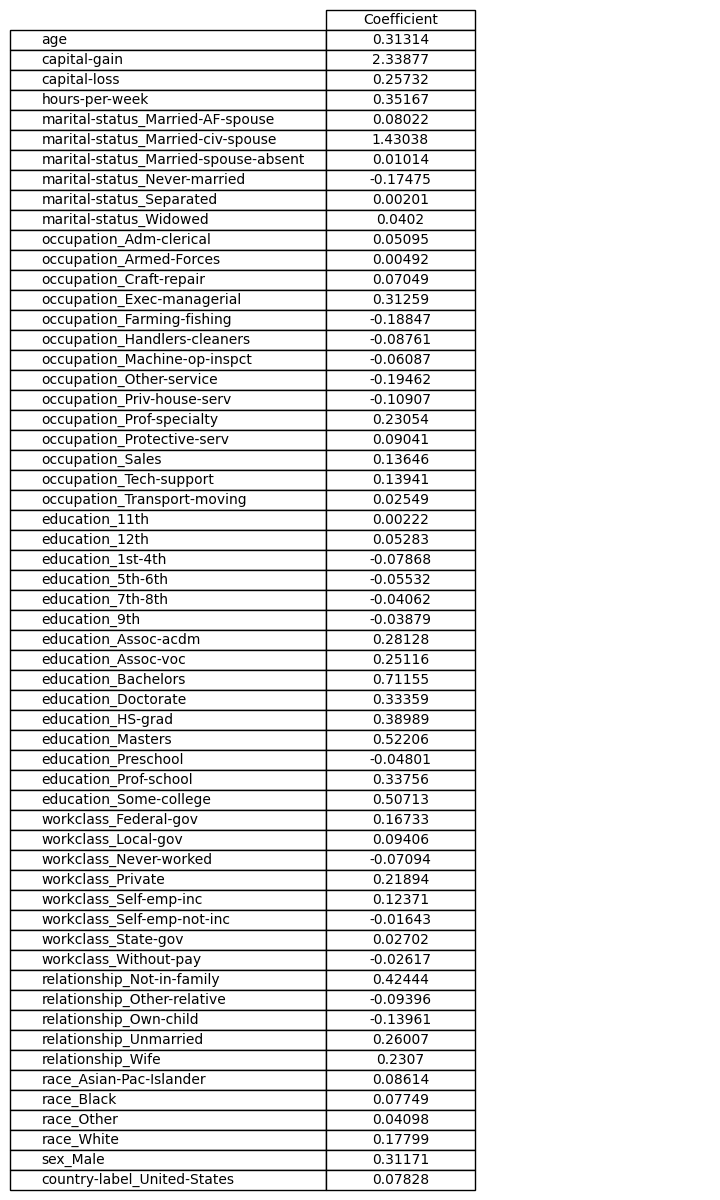

In [ ]:
# GUARDO LOS COEFICIENTES DE LA FORMULA DE REGRESIÓN
coefficients = pd.DataFrame(model.coef_[0], X_log.columns, columns=['Coefficient'])

coefficients = coefficients.round(5)

# Y CREO UNA TABLA EN FORMA DE IMAGEN PARA PODER COPIAR A WORD
from pandas.plotting import table
fig, ax = plt.subplots(figsize=(8, 4))  # Ajusta el tamaño según tus necesidades

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

tabla = table(ax, coefficients, loc='center', cellLoc='center', colWidths=[0.2]*len(coefficients.columns))

tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
tabla.scale(1.2, 1.2)

tabla

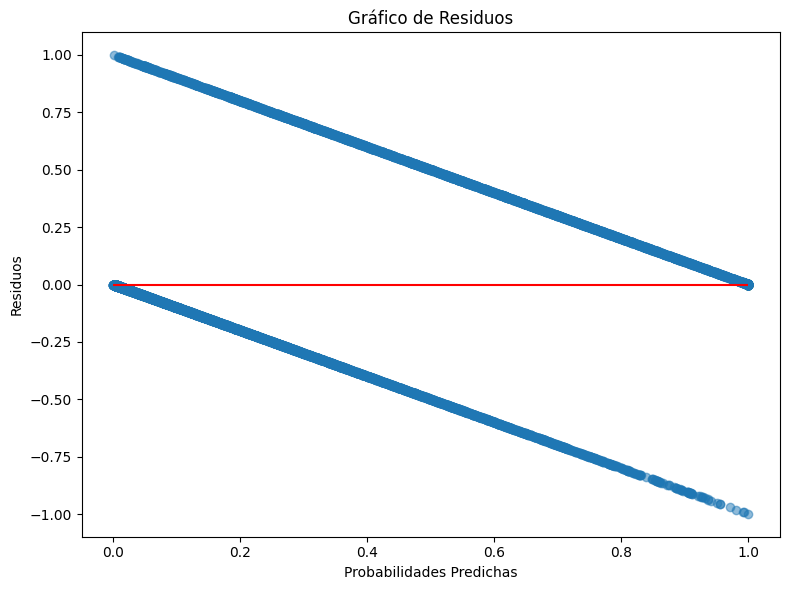

In [ ]:
# HAGO EL RESPECTIVO ANALISIS DE RESIDUOS CON EL GRAFICO
residuals = y_test_log - y_pred_prob

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_prob, residuals, alpha=0.5)
plt.hlines(y=0, xmin=0, xmax=1, colors='red')
plt.xlabel('Probabilidades Predichas')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.tight_layout()
plt.show()

## CLASIFICACION

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# CREO UN DICCIONARIO VACIO PARA METER LOS VALORES QUE SE UTILIZARAN PARA CAMBIAR
# LAS CATEGORIAS EN VALORES NUMÉRICOS
label_encoders = {}

# CONVIERTO LAS CATEGORÍAS EN VALORES NUMÉRICOS MAPEANDO TODAS LAS COLUMNAS QUE SEAN
# CATEGORICAS
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# AL IGUAL QUE CON EL MODELO PREDICTIVO, GUARDO LAS COLUMNAS QUE NO NECESITO EN EL MODELO
columnas_no_sirven = ['income', 'Intervalo_Edad', 'Education_Level','country-label']

# SEPARO LAS VARIABLES DEPENDIENTE, INDEPENDIENTE Y LA PONDERACIÓN
X = df.drop(columnas_no_sirven + ['fnlwgt'], axis=1)
y = df['income']
weights = df['fnlwgt']

# DIVIDO LOS DATOS EN ENTRENAMIENTO Y PRUEBA JUNTO CON LAS PONDERACIONES
X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(
    X, y, weights, test_size=0.3, random_state=42
)

In [ ]:
# ESCALO LAS VARIABLES INDEPENDIENTES.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# CREO EL MODELO CLASIFICATORIO
model_rf = RandomForestClassifier(random_state=42)

# ENTRENO EL MODELO
model_rf.fit(X_train, y_train, sample_weight=weights_train)

# HAGO LAS PREDICCIONES SOBRE EL CONJUNTO DE PRUEBA
y_pred = model_rf.predict(X_test)

In [ ]:
# REVISO LA CAPACIDAD CLASIFICATORIA DEL MODELO.
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8417442430181283
Confusion Matrix:
 [[9878  855]
 [1406 2148]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90     10733
           1       0.72      0.60      0.66      3554

    accuracy                           0.84     14287
   macro avg       0.80      0.76      0.78     14287
weighted avg       0.84      0.84      0.84     14287

